In [34]:
import numpy as np


from plot_utils import *


In [35]:
def brownian_density(δt, m):
    return np.sqrt(δt) * np.random.randn()

def euler_maruyama_sde_01(x, t, δt):
    m = x.shape[1]

    Xt = x[0, :]
    Yt = x[1, :]
    Zt = x[2, :]

    dUt = brownian_density(δt, m)
    dYt = brownian_density(δt, m)
    dZt = brownian_density(δt, m)

    dXt = δt * 10*(Yt - Xt)          + dUt
    dYt = δt * (Xt * (28 - Zt) - Yt) + dYt
    dZt = δt * (Xt * Yt - 8/3 * Zt)  + dZt
    return np.array([dXt, dYt, dZt])


def simulate_em_sde01(tmax, δt, m=3):
    t = np.arange(0, tmax, δt)
    m = 100

    x0   = np.array([[-5.91652, -5.52332, 24.57231]]).T * np.ones((1, m))
    xsim = np.full((3, m, len(t)), np.nan)
    xsim[:, :, 0] = x0

    for i, ti in enumerate(t[1:]):
        xsim[:, :, i+1] = euler_maruyama_sde_01(xsim[:,:,i], ti, ti-t[i])

    return t, xsim

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_13194/4129560690.py:16: RuntimeWarning: overflow encountered in multiply
  dYt = δt * (Xt * (28 - Zt) - Yt) + dYt
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_13194/4129560690.py:17: RuntimeWarning: overflow encountered in multiply
  dZt = δt * (Xt * Yt - 8/3 * Zt)  + dZt
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_13194/4129560690.py:17: RuntimeWarning: invalid value encountered in subtract
  dZt = δt * (Xt * Yt - 8/3 * Zt)  + dZt


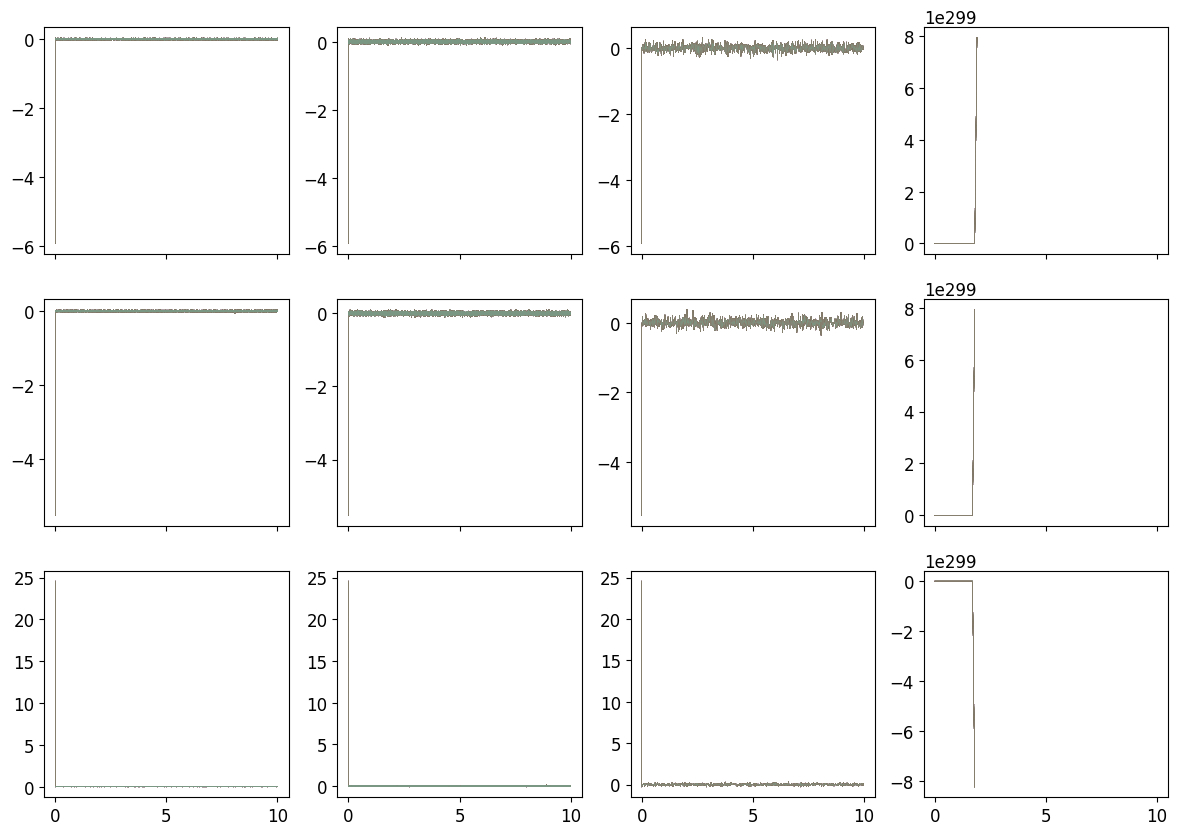

In [41]:
tmax = 10

t1, xsim1 = simulate_em_sde01(tmax, 0.0001, m=3)
t2, xsim2 = simulate_em_sde01(tmax, 0.001, m=3)
t3, xsim3 = simulate_em_sde01(tmax, 0.01, m=3)
t4, xsim4 = simulate_em_sde01(tmax, 0.1, m=3)


fig, ax = plt.subplots(3, 4, figsize=(14.5, 10), sharex=True)
ax[0, 0].plot(t1, xsim1[0, :, :].T, lw=0.2, alpha=0.3)
ax[1, 0].plot(t1, xsim1[1, :, :].T, lw=0.2, alpha=0.3)
ax[2, 0].plot(t1, xsim1[2, :, :].T, lw=0.2, alpha=0.3)

ax[0, 1].plot(t2, xsim2[0, :, :].T, lw=0.2, alpha=0.3)
ax[1, 1].plot(t2, xsim2[1, :, :].T, lw=0.2, alpha=0.3)
ax[2, 1].plot(t2, xsim2[2, :, :].T, lw=0.2, alpha=0.3)

ax[0, 2].plot(t3, xsim3[0, :, :].T, lw=0.2, alpha=0.3)
ax[1, 2].plot(t3, xsim3[1, :, :].T, lw=0.2, alpha=0.3)
ax[2, 2].plot(t3, xsim3[2, :, :].T, lw=0.2, alpha=0.3)

ax[0, 3].plot(t4, xsim4[0, :, :].T, lw=0.2, alpha=0.3)
ax[1, 3].plot(t4, xsim4[1, :, :].T, lw=0.2, alpha=0.3)
ax[2, 3].plot(t4, xsim4[2, :, :].T, lw=0.2, alpha=0.3)
